In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df =pd.read_csv("C:\\Users\\data2\\OneDrive\\Masaüstü\\codeware\\TASKS\\4task\\dataset.csv")

In [4]:
df.head()

,sID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

C:\Users\data2\AppData\Local\Temp\ipykernel_13648\2025342699.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Datetime"] = pd.to_datetime(df["Datetime"])


In [6]:
df =df.set_index("Datetime")

In [7]:
df =df.resample("D").sum()

In [8]:
train=df.iloc[:-30]

In [9]:
test=df.iloc[-30:]

# Acf Pacf

 sectigimiz lag degeri ile o anki degerin kendi icerisindeki kovaryans oranidir

ACF Grafiği: Serinin gecikmeler (lags) ile olan tüm ilişkilerini gösterir. Özellikle MA (Moving Average) terimlerinin derecesini belirlemede kullanılır.
PCA ise sadece spesifik 2 degeri alir arasindakileri almaz


In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

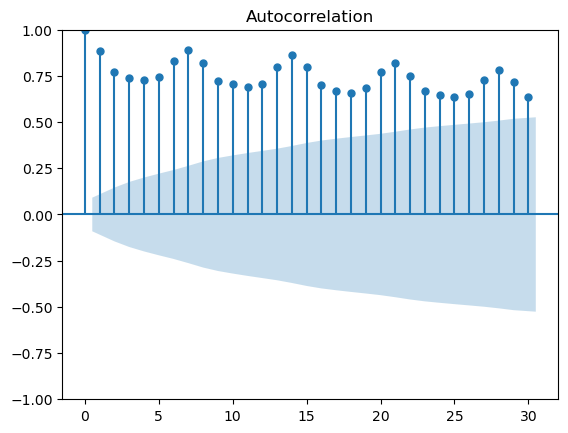

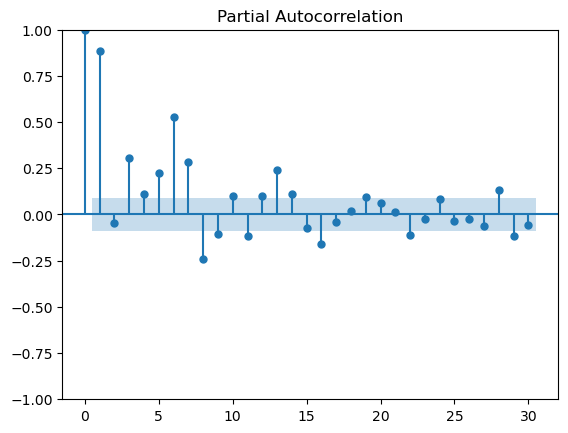

In [11]:
acf =plot_acf(train["Count"], lags=30)
pacf=plot_pacf(train["Count"], lags =30)

# AR, MA ,ARMA ...

##### ACF VE PACF DAN SECTIGIM DEGERLERI KOYACAGIM

In [12]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.ar_model import AutoReg as ar ## ar

# AR MODEL (1)

In [13]:
ar_model=ar(train["Count"] , lags=1).fit() ## 1 verdim cunku grafikte en yuksek deger oydu

In [14]:
ar_forecast = ar_model.predict(start=len(test), end=len(test) + 29)

In [15]:
ar_forecast = pd.DataFrame(ar_forecast)

#### elimizde forecast.fit sekilde var bunu test verisi ile kiyaslayacagiz.train grafigini cizdirmesek de olurdu

In [16]:
ar_forecast =ar_forecast.rename(columns={0:"deneme"})

In [17]:
test

,sID,Count
Datetime,,
2013-12-02,267540,4042
2013-12-03,268116,6186
2013-12-04,268692,5078
2013-12-05,269268,4948
2013-12-06,269844,4558
2013-12-07,270420,2344
2013-12-08,270996,2414
2013-12-09,271572,4394
2013-12-10,272148,3850


In [18]:
y_pred =test["Count"].values
y_target =ar_forecast["deneme"].values

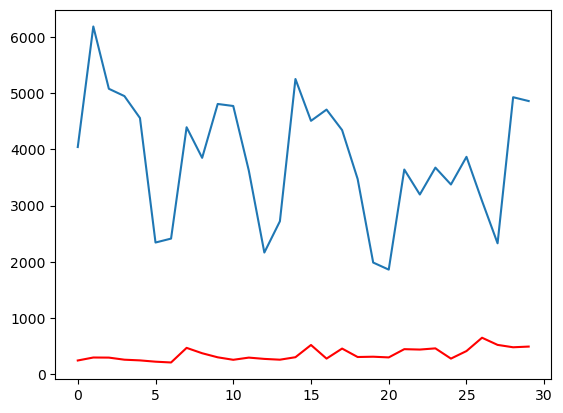

In [19]:
plt.plot(y_pred)
plt.plot(y_target, color='red', label='Test')

In [20]:
y_target=test["Count"].values
y_pred =ar_forecast["deneme"].values

In [21]:
mae= mean_absolute_error(y_target , y_pred)
mape = np.mean(np.abs((y_target - y_pred) / y_pred)) * 100
mse = mean_squared_error(y_target,y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 3476.49
MAPE: 1059.38%
MSE: 13288199.55
RMSE: 3645.30


## MA (2)

 ma da test verisini kullanamayiz cunku zaten tek bir deger alacaktir

In [22]:
train_ma=train.rolling(window=5).mean()

In [23]:
last_value=train_ma.iloc[-1]

In [24]:
ma_forecast = pd.Series([last_value] * len(test), index=test.index)

In [25]:
ma_forecast = test

In [26]:
ma_forecast =test.applymap(lambda x:3463)

In [27]:
y_target=test["Count"].values
y_pred =ma_forecast["Count"].values

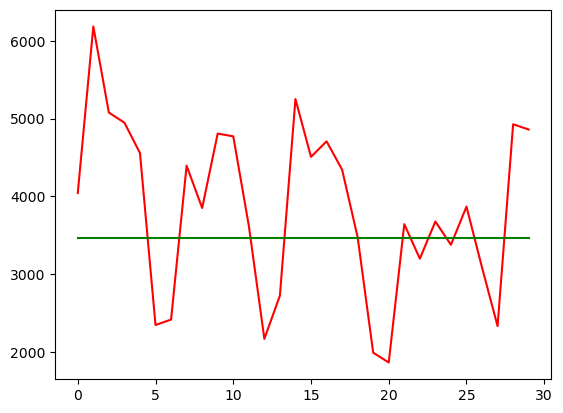

In [28]:
plt.plot(y_target, label='Test Data', color='red')
plt.plot(y_pred, label='Moving Average Forecast', color='green' )
## train koyunca veri kiyasi yapmak zorlasiyordu (zaten gereksiz)

In [29]:
mae= mean_absolute_error(test,ma_forecast)
mape = np.mean(np.abs((test - ma_forecast) / test)) * 100
mse = mean_squared_error(test, ma_forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 136704.6
MAPE: 63.19657744684961%
MSE: 37121876351.933334
RMSE: 192670.38265372635


## ARMA (p,q) (3)

### AR da p MA da q = (anladigim kadariyla grafikteki en yuksekleri aldim ve hepsinde 1 sayisi en yuksekti)

bilgisayara  pip install pmdarima

In [30]:
arma_model = ARIMA(train["Count"]).fit()

In [31]:
arma_forecast =arma_model.forecast(steps=len(test))

In [32]:
y_target=test["Count"].values
y_pred=arma_forecast.values

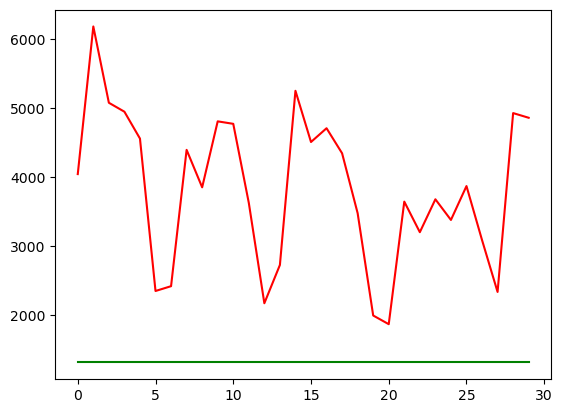

In [33]:
plt.plot(y_target,color="red")
plt.plot(y_pred,color="green")

In [38]:
mae= mean_absolute_error(y_target,y_pred)
mape = np.mean(np.abs((y_pred - y_target) / y_pred)) * 100
mse = mean_squared_error(y_target,y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 2527.657561997081
MAPE: 193.57022040650168%
MSE: 7588918.066276586
RMSE: 2754.7990972621915


## ARIMA

Integreted'i kendin yaz : differencing ile farkini al 

In [42]:
def integred_differencing(df,x):
    yeni=df.diff(periods=x).dropna()
    return yeni

In [46]:
a = integred_differencing(train['Count'], 1)

In [76]:
arima=ARIMA(train["Count"],order=(1,1,1)).fit() ##sayialri grafikte en iyi 1 diye aldim

In [65]:
arima_forecast=arima.forecast(steps=len(test))

In [68]:
y_target=test["Count"].values
y_pred=arima_forecast.values

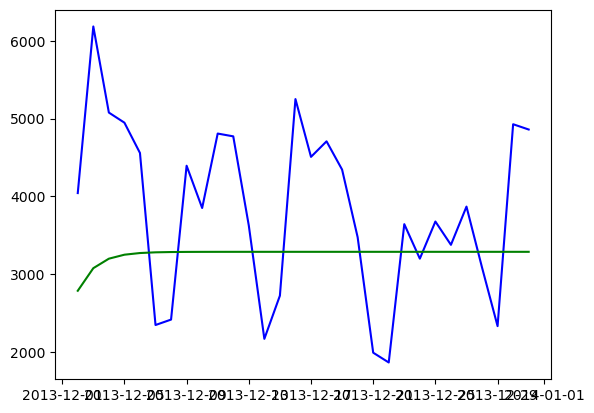

In [82]:
plt.plot(test.index,y_target,color="blue")
plt.plot(test.index,y_pred,color="green")

#### traini cizdirmeye gerek yok lakin gorunebilmesi /anladigimi gosterebilmek adina cizdirdim :// :))


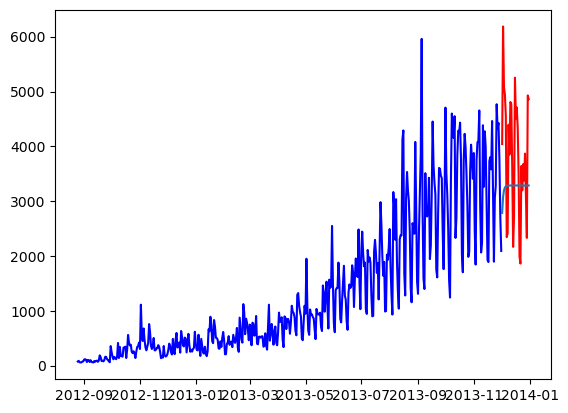

In [89]:
plt.plot(train["Count"],color="blue")
plt.plot(test.index,y_target,color="red")
plt.plot(test.index,arima_forecast)

In [77]:
mae= mean_absolute_error(y_target,y_pred)
mape = np.mean(np.abs((y_pred - y_target) / y_pred)) * 100
mse = mean_squared_error(y_target,y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1073.3562765034078
MAPE: 33.19122500262864%
MSE: 1591190.6073966736
RMSE: 1261.4240394873857


In [ ]:
plot_acf(a, ax=plt.gca())
plot_pacf(a, ax=plt.gca())
